# Activity 9: Extracting the Top 100 eBooks from Gutenberg 

Import necessary libraries including regex, and beautifulsoup

In [1]:
import urllib.request, urllib.parse, urllib.error
import requests
from bs4 import BeautifulSoup
import ssl
import re
import numpy as np

Check the SSL certificate 

In [2]:
#Ignore SSL certificate errors
ctx = ssl.create_default_context()
ctx.check_hostname = False
ctx.verify_mode = ssl.CERT_NONE

Read the HTML from the URL

In [3]:
# Read the HTML from the URL and pass on to BeautifulSoup
top100url = 'https://www.gutenberg.org/browse/scores/top'
response = requests.get(top100url)

Write a small function to check the status of web request

In [4]:
# Create a statuse_check function by using the follwoing command  
def status_check(r):
    if r.status_code==200:
        print("Success!")
        return 1
    else:
        print("Failed!")
        return -1

In [5]:
# Check the responce using the statuse_check command
status_check(response)

Success!


1

Decode the response and pass on to BeautifulSoup for HTML parsing

In [6]:
#Decode the contents of the response
contents = response.content.decode(response.encoding)

In [7]:
#Pass the whole string (HTML content) to the method for parsing
soup = BeautifulSoup(contents, 'html.parser')

In [8]:
#Check the type of the decoded object 
type(contents)

str

In [9]:
#Check the length of the object abd try printing some of it
len(contents)

58271

In [10]:
#print the initial portion of the this text
print(contents[100:600])

le>Top 100 | Project Gutenberg</title>
 <link rel="stylesheet" href="/gutenberg/style.css?v=1.1">
 <link rel="stylesheet" href="/gutenberg/collapsible.css?1.1">
 <link rel="stylesheet" href="/gutenberg/new_nav.css?v=1.321231">
<link rel="stylesheet" href="/gutenberg/pg-desktop-one.css">
 <meta name="viewport" content="width=device-width, initial-scale=1">
 <meta name="keywords" content="books, ebooks, free, kindle, android, iphone, ipad"/>
 <meta name="google-site-verification" content="wucOEvSn


Find all the href tags and store them in the list of links. Check how the list looks like - print first 30 elements


In [11]:
# Empty list to hold all the http links in the HTML page
lst_links=[]

In [12]:
# Find all the href tags and store them in the list of links
for link in soup.find_all('a'):
    #print(link.get('href'))
    lst_links.append(link.get('href'))

In [13]:
#Print first 30 elements
lst_links[:30]

['/',
 '/about/',
 '/about/',
 '/policy/collection_development.html',
 '/about/contact_information.html',
 '/about/background/',
 '/policy/permission.html',
 '/policy/privacy_policy.html',
 '/policy/terms_of_use.html',
 '/ebooks/',
 '/ebooks/',
 '/ebooks/bookshelf/',
 '/browse/scores/top',
 '/ebooks/offline_catalogs.html',
 '/help/',
 '/help/',
 '/help/copyright.html',
 '/help/errata.html',
 '/help/file_formats.html',
 '/help/faq.html',
 '/policy/',
 '/help/public_domain_ebook_submission.html',
 '/help/submitting_your_own_work.html',
 '/help/mobile.html',
 '/attic/',
 '/donate/',
 '/donate/',
 '#books-last1',
 '#authors-last1',
 '#books-last7']

Use regular expression to find the numeric digits in these links.
These are the file number for the Top 100 books.

In [14]:
#Define a string and a pattern
string1 = 'Paython'
pattern = r"Paython"

In [15]:
#Write a conditional experssion to check for a match 
if re.match(pattern, string1):
    print("Matches!")
else:
    print("Doesn't matche.")

Matches!


The output is 'Matches', means condition is matches

Initialize empty list to hold the file numbers over and appropriate range and use regex to find the numeric digits in the link 'href' string. Use the findall method. 

In [16]:
#Initialize the empy list 
booknum=[]

In [17]:
for i in range(0,100):
    link=lst_links[i]
    link=link.strip()
    # Regular expression to find the numeric digits in the link (href) string
    n=re.findall('[0-9]+',link)
    if len(n)==1:
        # Append the filenumber casted as integer
        booknum.append(int(n[0]))

In [18]:
#Print the file numbers
print ("\nHere's the top 100 ebooks on Gutenberg\n"+"-"*38)
print(booknum)



Here's the top 100 ebooks on Gutenberg
--------------------------------------
[1, 1, 7, 7, 30, 30, 1342, 68137, 11, 84, 1661, 68134, 20228, 2701, 345, 98, 174, 64317, 4300, 68133, 1952, 32449, 43, 2600, 1400, 68135, 1260, 1080, 35899, 1184, 2554, 1232, 2591, 30254, 2542, 47629, 5740, 76, 45, 5200, 74, 6130, 219, 844, 46, 514, 120, 55, 158, 1727, 135, 28054, 27827, 10623, 2852, 58585, 68140, 2814, 25344, 1497, 996, 4363, 35, 16, 766, 68136, 730, 768, 67098, 10676, 205, 1399, 244]


What does the soup object's text look like? Use .text() method and print only first 2000 characters (do not print the whole thing, it is long).

In [19]:
#Print first 2000 characters
print(soup.text[:2000])






Top 100 | Project Gutenberg



























Menu▾



About
          ▾

▾


About Project Gutenberg
Collection Development
Contact Us
History & Philosophy
Permissions & License
Privacy Policy
Terms of Use



Search and Browse
      	  ▾

▾


Book Search
Bookshelves
Frequently Downloaded
Offline Catalogs



Help
          ▾

▾


All help topics →
Copyright Procedures
Errata, Fixes and Bug Reports
File Formats
Frequently Asked Questions
Policies →
Public Domain eBook Submission
Submitting Your Own Work
Tablets, Phones and eReaders
The Attic →


Donate










Donation







Frequently Viewed or Downloaded
These listings are based on the number of times each eBook gets downloaded.
      Multiple downloads from the same Internet address on the same day count as one download, and addresses that download more than 100 eBooks in a day are considered robots and are not counted.

Downloaded Books
2022-05-21134032
last 7 days1067660
last 30 days4882328



Top 100 EBooks yesterd

Search in the extracted text (using regular expression) from the soup object to find the names of top 100 Ebooks (Yesterday's rank)

In [20]:
# Temp empty list of Ebook names
lst_titles_temp=[]

Create a starting index. It should point at the text "Top 100 Ebooks yesterday".Use the Use the splitlines() method of the soup.text. It splits the lines of the text of the soup object.

In [21]:
# Create start_idx use splitline method to define "Top 100 Ebooks yesterday"
start_idx=soup.text.splitlines().index('Top 100 EBooks yesterday')

Loop 1-100 to add the strings of next 100 lines to this temporary list. Hint: splitlines() method

In [22]:
#Loop the string of next 100 lines use splitlines method 
for i in range(100):
    lst_titles_temp.append(soup.text.splitlines()[start_idx+2+i])

Use regular expression to extract only text from the name strings and append to an empty list. Use match and span to find the indices and use them 


In [23]:
#Create the first title
lst_titles=[]
#Create a for loop of 100 string lines 
for i in range(100):
    id1,id2=re.match('^[a-zA-Z ]*',lst_titles_temp[i]).span()
    lst_titles.append(lst_titles_temp[i][id1:id2])

In [24]:
#Print the list of title
for l in lst_titles:
    print(l)

Top 
Top 
Top 
Top 


Top 

Pride and Prejudice by Jane Austen 
The cake and biscuit book by Elizabeth Douglas 
Alice
Frankenstein
The Adventures of Sherlock Holmes by Arthur Conan Doyle 
The book of Earth by Alfred Noyes 
Noli Me Tangere by Jos
Moby Dick
Dracula by Bram Stoker 
A Tale of Two Cities by Charles Dickens 
The Picture of Dorian Gray by Oscar Wilde 
The Great Gatsby by F
Ulysses by James Joyce 
The history of the proceedings in the case of Margaret
The Yellow Wallpaper by Charlotte Perkins Gilman 
Japanese Girls and Women by Alice Mabel Bacon 
The Strange Case of Dr
War and Peace by graf Leo Tolstoy 
Great Expectations by Charles Dickens 
Flower o
Jane Eyre
A Modest Proposal by Jonathan Swift 
The Philippines a Century Hence by Jos
The Count of Monte Cristo
Crime and Punishment by Fyodor Dostoyevsky 
The Prince by Niccol
Grimms
The Romance of Lust
A Doll
Ang 
Tractatus Logico
Adventures of Huckleberry Finn by Mark Twain 
Anne of Green Gables by L
Metamorphosis by Franz Kafk

# Activity 10: Building your own movie database by reading from an API

Import urllib.request, urllib.parse, urllib.error, and jonson

In [25]:
# Import pakagers 
import urllib.request, urllib.parse, urllib.error
import json

Load the secret API key (you have to get one from OMDB website and use that, 1000 daily limit) from a JSON file, stored in the same folder into a variable, by using json.load

In [26]:
import requests

In [27]:
#Obtain a mkey 
{"key":'46747933'}

{'key': '46747933'}

In [28]:
{"key":'46747933'}
# Store a key in JSON as APIkeys.json
# Open the APIkeys.json file
with open('APIkeys.json') as f:
    key = json.load(f)
    secretapikey=key["OMDBapi"]

In [29]:
# Assign the OMDb portal
serviceurl = 'http://www.omdbapi.com/?'
# Create a apikey variable with the last portion of the URL
apikey = '&apikey='+secretapikey

Write a utility function print_json to print nicely the movie data from a JSON file (which we will get from the portal)

In [30]:
# Write a print_json utility function to print the movie data from a JSON file
def print_json(json_data):
    # Assign list_keys 
    list_keys=['Title', 'Year', 'Rated', 'Released', 'Runtime', 'Genre', 'Director', 'Writer', 
               'Actors', 'Plot', 'Language', 'Country', 'Awards', 'Ratings', 
               'Metascore', 'imdbRating', 'imdbVotes', 'imdbID']
    print("-"*50)
    for k in list_keys:
        if k in list(json_data.keys()):
            print(f"{k}: {json_data[k]}")
    print("-"*50)

Write a utility function to download a poster of the movie based on the information from the jason dataset and save in your local folder

In [31]:
def save_poster(json_data):
    import os
    title = json_data['Title']
    poster_url = json_data['Poster']
    # Splits the poster url by '.' and picks up the last string as file extension
    poster_file_extension=poster_url.split('.')[-1]
    # Reads the image file from web
    poster_data = urllib.request.urlopen(poster_url).read()
        
    savelocation=os.getcwd()+'\\'+'Posters'+'\\'
    # Creates new directory if the directory does not exist. Otherwise, just use the existing path.
    if not os.path.isdir(savelocation):
        os.mkdir(savelocation)
    
    filename=savelocation+str(title)+'.'+poster_file_extension
    f=open(filename,'wb')
    f.write(poster_data)
    f.close()

Write a utility function search_movie to search a movie by its name, print the downloaded JSON data (use the print_json function for this) and save the movie poster in the local folder (use save_poster function for this)

In [32]:
def search_movie(title):
    try:
        url = serviceurl + urllib.parse.urlencode({'t': str(title)})+apikey
        print(f'Retrieving the data of "{title}" now... ')
        print(url)
        uh = urllib.request.urlopen(url)
        data = uh.read()
        json_data=json.loads(data)
        
        if json_data['Response']=='True':
            print_json(json_data)
            # Asks user whether to download the poster of the movie
            if json_data['Poster']!='N/A':
                save_poster(json_data)
        else:
            print("Error encountered: ",json_data['Error'])
    
    except urllib.error.URLError as e:
        print(f"ERROR: {e.reason}")

In [33]:
#search_movie("Titanic")

In [34]:
#search_movie("Random_error")

# Connect to the Twitter API and do a simple data pull


In [35]:
# Install twitter 
! pip install twitter

In [36]:
# Install the python-twitter library
! pip install python-twitter

In [37]:
#! pip install tweepy

In [38]:
#import tweepy

In [39]:
# Import general pakages 
import numpy as np
import os
import time
import datetime
import ctypes
import json

In [40]:
# Import the Twitter library and enter the credentials as follows:
import twitter
Api = twitter.Api(consumer_key = 'FTH4FIigWPJlaH5EiBuJPnnvX',
consumer_secret = 'o7MlhyidpNN6Mto8DDc6IqcLEIZgcAFKPfZ6o6M8DiZEO9tUJr',
#bearer_token = 'AAAAAAAAAAAAAAAAAAAAAIoCcwEAAAAAVGCgpuXgTttaPuyZCq5GuNqMQcE%3D2ckDW9q185Br2gCcwGTQonWwDpKzX2dGcTr2T9U0X0LQajXISE',
access_token_key = '1498922467976355840-aTPwoM7r2Qd8PZd2mmCwDVgvOfE9K4',
access_token_secret = 'yDZCJxauXwvRf6rQQQ6Q9Mgp37OwUydCXmoneJnDDWDGa')

In [41]:
# Verify Credentials
print(Api.VerifyCredentials())

{"created_at": "Wed Mar 02 07:26:14 +0000 2022", "default_profile": true, "default_profile_image": true, "friends_count": 6, "id": 1498922467976355840, "id_str": "1498922467976355840", "name": "Yousof Rahimian", "profile_background_color": "F5F8FA", "profile_image_url": "http://abs.twimg.com/sticky/default_profile_images/default_profile_normal.png", "profile_image_url_https": "https://abs.twimg.com/sticky/default_profile_images/default_profile_normal.png", "profile_link_color": "1DA1F2", "profile_sidebar_border_color": "C0DEED", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "screen_name": "rahimian_yousof", "withheld_in_countries": []}


# Download User Timeline

In [42]:
# utilizing Twitter functions remotely
# Download a user timeline of tweets
# Specifying the screen name 'Tesla' for the appropriate account
statuses = Api.GetUserTimeline(screen_name='Tesla')
print([s.text for s in statuses])

['RT @elonmusk: Tesla is building a hardcore litigation department where we directly initiate &amp; execute lawsuits. The team will report direct…', 'https://t.co/YwpofifB7q', 'Select Supercharger stations now open to non-Tesla EVs in Belgium 🇧🇪, the UK 🇬🇧, Austria 🇦🇹, Spain 🇪🇸 and Sweden 🇸🇪', '👋🚢 🚘 https://t.co/tCGCW5xGcB', 'RT @elonmusk: Tesla AI Day #2 on Aug 19. So many cool updates!', 'Fun on tap 🎢\n\n🎥 @saradietschy https://t.co/o0lhc1Webd https://t.co/BStyuW1BZF', 'In 2021, we received almost 3 million job applications. \n\nJoin us! https://t.co/wOIwB0p5rf https://t.co/Z5MJo9khrt', 'We created nearly 100k direct new jobs in just one decade – and are planning to grow for years to come ✌ https://t.co/xSAcfvyT0s', 'At the end of their usable life, we recycle battery packs to build brand new batteries https://t.co/zfPt8MPMdU', 'Battery longevity is critical. Every battery we make is designed to outlast the vehicle it’s in https://t.co/ZbTzQN55u4', 'Our manufacturing efficiency gets 

In [43]:
# Download a list of my accounts
users = Api.GetFriends()
print([u.name for u in users])

['Elon Musk', 'Reza Pahlavi', 'Masih Alinejad 🏳️', 'Tesla', 'Mike Pompeo', 'SpaceX']


In [44]:
# Download a list of my Followers
followers = Api.GetFollowers()
print([f.name for f in followers])

[]


In [45]:
# Print number of users wish to fetch
followers = Api.GetFollowers(total_count=100)
print([f.name for f in followers])

[]


# Search Tweets

In [46]:
# Use the GetSearch() function for the term “bigdata” 
Api.GetSearch(term='bigdata', since=2016-11-21, count=10)

[Status(ID=1528006971592417280, ScreenName=KirkDBorne, Created=Sat May 21 13:37:05 +0000 2022, Text='#SQL vs #NoSQL infographic \n————————\n#Database #AI #MachineLearning  #BigData #DataScience #Python #Programming… https://t.co/oLE2oEtcyt'),
 Status(ID=1528233891668041728, ScreenName=KirkDBorne, Created=Sun May 22 04:38:47 +0000 2022, Text='[Free PDF Download] Introduction to #Probability for Data Science: https://t.co/L51j3udY5j by @stanley_h_chan \n————… https://t.co/DuBBEmHn7e'),
 Status(ID=1528006858870431744, ScreenName=KirkDBorne, Created=Sat May 21 13:36:38 +0000 2022, Text='#DataScientist Job: Expectation vs. Reality [#infographic]\n——————\n#BigData #DataScience #Analytics #AI… https://t.co/pXSUE3Pngl'),
 Status(ID=1528593554444292096, ScreenName=Bindikannan963, Created=Mon May 23 04:27:57 +0000 2022, Text='RT @AndGenomics: Integrating Molecular Biology and Bioinformatics Education\nhttps://t.co/Khe0WJ7Eq4\n\n#Bioinformatics #research #genomics #r…'),
 Status(ID=15285935351124

In [47]:
# Gather tweets before 21st November 2016 that contain the term “bigdata”
Api.GetSearch(term='bigdata', since=2016-11-21, count=10)

[Status(ID=1528006971592417280, ScreenName=KirkDBorne, Created=Sat May 21 13:37:05 +0000 2022, Text='#SQL vs #NoSQL infographic \n————————\n#Database #AI #MachineLearning  #BigData #DataScience #Python #Programming… https://t.co/oLE2oEtcyt'),
 Status(ID=1528233891668041728, ScreenName=KirkDBorne, Created=Sun May 22 04:38:47 +0000 2022, Text='[Free PDF Download] Introduction to #Probability for Data Science: https://t.co/L51j3udY5j by @stanley_h_chan \n————… https://t.co/DuBBEmHn7e'),
 Status(ID=1528006858870431744, ScreenName=KirkDBorne, Created=Sat May 21 13:36:38 +0000 2022, Text='#DataScientist Job: Expectation vs. Reality [#infographic]\n——————\n#BigData #DataScience #Analytics #AI… https://t.co/pXSUE3Pngl'),
 Status(ID=1528593554444292096, ScreenName=Bindikannan963, Created=Mon May 23 04:27:57 +0000 2022, Text='RT @AndGenomics: Integrating Molecular Biology and Bioinformatics Education\nhttps://t.co/Khe0WJ7Eq4\n\n#Bioinformatics #research #genomics #r…'),
 Status(ID=15285935351124

In [48]:
Api.GetSearch(term='bigdata', until=2016-11-21, count=10)

[]

In [49]:
# Search tweets by geolocation — specifically tweets sent since 18th November within a 1 mile radius of Times Square, New York
Api.GetSearch(geocode="40.758896,-73.985130,1mi", since=2016-11-18)

[Status(ID=1528160338260238337, ScreenName=katxmoon, Created=Sat May 21 23:46:31 +0000 2022, Text='Dramarama on the setlist ARE YOU KIDDING ME #MONSTAXUSTOUR https://t.co/1n3MkhEOgm'),
 Status(ID=1528157625803849731, ScreenName=Jeff__Benjamin, Created=Sat May 21 23:35:44 +0000 2022, Text='Tonight: @OfficialMonstaX sold out at @RadioCity! One of my favorite venues ever. So proud! Have a great show, guys! https://t.co/45XuDADu2V'),
 Status(ID=1528192967638409216, ScreenName=Jeff__Benjamin, Created=Sun May 22 01:56:10 +0000 2022, Text='"Everyone: be happy, stay happy" -Joohoney @OfficialMonstaX'),
 Status(ID=1528593452560265216, ScreenName=511nyACE, Created=Mon May 23 04:27:33 +0000 2022, Text='Incident on #ELine NB at Lexington Av/53 St https://t.co/KD5qMJl8Pj'),
 Status(ID=1528593451566215168, ScreenName=511NY, Created=Mon May 23 04:27:33 +0000 2022, Text='Incident on #ELine NB at Lexington Av/53 St https://t.co/GwkCsXvnNt'),
 Status(ID=1528592669571788800, ScreenName=mpvpapi, Created=M

# Visualizations


In [50]:
#Import general python packages

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [51]:
#Read ('SmartWay Vehicle List for MY 2022.xlsx') file
df=pd.read_excel('SmartWay Vehicle List for MY 2022.xlsx', "all_alpha_22")
df.head()

,Model,Displ,Cyl,Trans,Drive,Fuel,Cert Region,Stnd,Stnd Description,Underhood ID,Veh Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay
0,AUDI A3,2.0,4.0,AMS-7,2WD,Gasoline,CA,L3SULEV30,California LEV-III SULEV30,NVGAV02.0A3B,small car,7,29,38,32,7,Yes
1,AUDI A3,2.0,4.0,AMS-7,2WD,Gasoline,FA,T3B30,Federal Tier 3 Bin 30,NVGAV02.0A3B,small car,7,29,38,32,7,Yes
2,AUDI A3,2.0,4.0,AMS-7,4WD,Gasoline,CA,L3SULEV30,California LEV-III SULEV30,NVGAV02.0A3B,small car,7,28,36,31,7,Yes
3,AUDI A3,2.0,4.0,AMS-7,4WD,Gasoline,FA,T3B30,Federal Tier 3 Bin 30,NVGAV02.0A3B,small car,7,28,36,31,7,Yes
4,AUDI A7 TFSI e quattro,2.0,4.0,AMS-7,4WD,Gasoline/Electricity,CA,L3SULEV30,California LEV-III SULEV30,NVGAJ02.0A3P,midsize car,7,25/66,31/75,27/70,10,Yes


In [52]:
#Identify variables and it's attributes in the dataset
df.shape
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403 entries, 0 to 402
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model                 403 non-null    object 
 1   Displ                 235 non-null    float64
 2   Cyl                   235 non-null    float64
 3   Trans                 403 non-null    object 
 4   Drive                 403 non-null    object 
 5   Fuel                  403 non-null    object 
 6   Cert Region           403 non-null    object 
 7   Stnd                  403 non-null    object 
 8   Stnd Description      403 non-null    object 
 9   Underhood ID          403 non-null    object 
 10  Veh Class             403 non-null    object 
 11  Air Pollution Score   403 non-null    int64  
 12  City MPG              403 non-null    object 
 13  Hwy MPG               403 non-null    object 
 14  Cmb MPG               403 non-null    object 
 15  Greenhouse Gas Score  4

,Displ,Cyl,Air Pollution Score,Greenhouse Gas Score
count,235.000000,235.000000,403.000000,403.000000
mean,1.994043,4.008511,8.250620,8.823821
std,0.404101,0.381086,1.480963,1.312484
min,1.300000,3.000000,7.000000,7.000000
25%,1.600000,4.000000,7.000000,7.000000
50%,2.000000,4.000000,7.000000,9.000000
75%,2.400000,4.000000,10.000000,10.000000
max,3.600000,6.000000,10.000000,10.000000


In [53]:
#Read the columns names 
df.columns

Index(['Model', 'Displ', 'Cyl', 'Trans', 'Drive', 'Fuel', 'Cert Region',
       'Stnd', 'Stnd Description', 'Underhood ID', 'Veh Class',
       'Air Pollution Score', 'City MPG', 'Hwy MPG', 'Cmb MPG',
       'Greenhouse Gas Score', 'SmartWay'],
      dtype='object')

# Histogram 

Text(0.5, 1.0, 'Histogram of Greenhouse Gas Score')

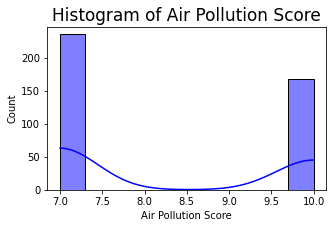

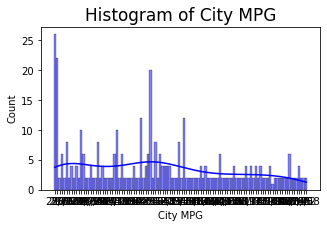

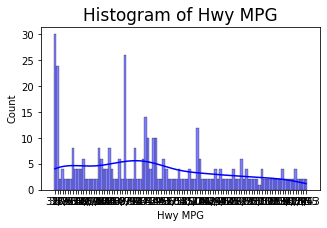

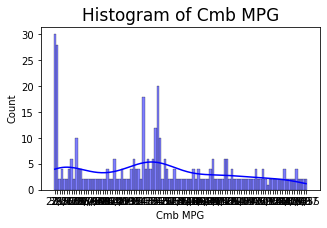

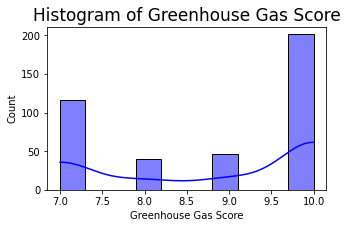

In [54]:
#Draw histogram of 5 variables we are working with

plt.figure(figsize=(5,3))
sns.histplot(df['Air Pollution Score'], kde = True, color = 'blue')
plt.title('Histogram of Air Pollution Score', fontsize=17)

plt.figure(figsize=(5,3))
sns.histplot(df['City MPG'], kde = True, color = 'blue')
plt.title('Histogram of City MPG', fontsize=17)

plt.figure(figsize=(5,3))
sns.histplot(df['Hwy MPG'], kde = True, color = 'blue')
plt.title('Histogram of Hwy MPG', fontsize=17)

plt.figure(figsize=(5,3))
sns.histplot(df['Cmb MPG'], kde = True, color = 'blue')
plt.title('Histogram of Cmb MPG', fontsize=17)

plt.figure(figsize=(5,3))
sns.histplot(df['Greenhouse Gas Score'], kde = True, color = 'blue')
plt.title('Histogram of Greenhouse Gas Score', fontsize=17)

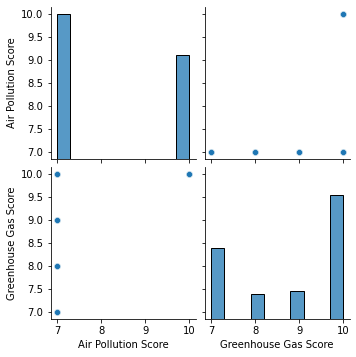

In [55]:
import seaborn as sns
sns.pairplot(df[['Air Pollution Score', 'City MPG', 'Hwy MPG', 'Cmb MPG', 'Greenhouse Gas Score']])

# Scatter

Text(0.5, 1.0, 'Fule vs. Hwy MPG')

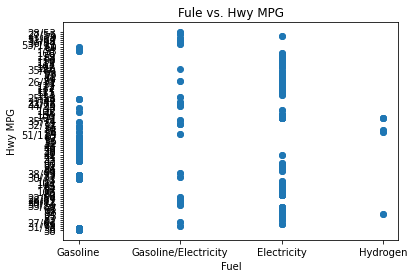

In [56]:
#Scatter plot between pedal_cycles and two_wheeled_motor_vehicles 

plt.scatter(df['Fuel'], df['Hwy MPG'])
plt.xlabel("Fuel")
plt.ylabel("Hwy MPG")
plt.title("Fule vs. Hwy MPG")

In [57]:
df.columns

Index(['Model', 'Displ', 'Cyl', 'Trans', 'Drive', 'Fuel', 'Cert Region',
       'Stnd', 'Stnd Description', 'Underhood ID', 'Veh Class',
       'Air Pollution Score', 'City MPG', 'Hwy MPG', 'Cmb MPG',
       'Greenhouse Gas Score', 'SmartWay'],
      dtype='object')

In [58]:
#Drop columns by the mame to get integer for Pie chart
df.drop(['Model', 'Trans', 'Drive', 'Fuel', 'Cert Region','City MPG', 'Hwy MPG', 'Cmb MPG', 
         'Stnd', 'Stnd Description', 'Underhood ID', 'Veh Class', 'SmartWay'], axis=1, inplace=True)
df

,Displ,Cyl,Air Pollution Score,Greenhouse Gas Score
0,2.0,4.0,7,7
1,2.0,4.0,7,7
2,2.0,4.0,7,7
3,2.0,4.0,7,7
4,2.0,4.0,7,10
...,...,...,...,...
398,NaN,NaN,10,10
399,2.0,4.0,7,8
400,2.0,4.0,7,8
401,2.0,4.0,7,9


In [59]:
row_num = [5] # No. of the row
font_color = '#525252'
colors = ['#f7ecb0', '#ffb3e6', '#99ff99', '#66b3ff', '#c7b3fb','#ff6666', '#f9c3b7']
values = df.loc[row_num].values.tolist()[0] # crime numbers
labels = [x[1] for x in df.columns] # crime names
title = df.loc[row_num].index.values.tolist()[0] 

In [60]:
def removeprc(string): #removes the % from a string 
    string = str(string)
    list = string.split('%')
    string = " ".join(list)
    
    return string

AttributeError: 'DataFrame' object has no attribute 'rcParams'

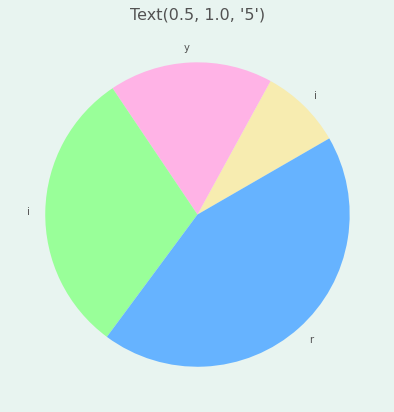

In [62]:
# Create subplots and a pie chart
fig, ax = plt.subplots(figsize=(10, 7), facecolor='#e8f4f0')
ax.pie(values, labels=labels, colors=colors, startangle=30, textprops={'color':font_color})
# Set title, its position, and font size
title = plt.title(title, fontsize=16, color=font_color)
title.set_position([.5, 1.02])
df.rcParams['font.size'] = 16.0